In [50]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
from numpy import mean
import pandas as pd
import scipy 
from scipy import mean

In [52]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [53]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [54]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
print(engine)

Engine(sqlite:///Resources/hawaii.sqlite)


In [55]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [78]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [57]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [58]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [59]:
# Calculate the date 1 year ago from today
precipsept2017= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date =="2017-09-12").all()
precipsept2017

[]

In [60]:
# Perform a query to retrieve the data and precipitation scores
PrcpQuery=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2017-01-01', '2017-31-12')).all()
PrcpQuery

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 (

In [61]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp_df=pd.DataFrame(PrcpQuery)
Prcp_df.set_index('date').head()



,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


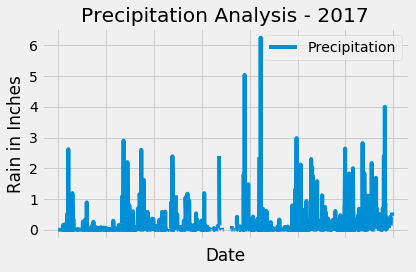

In [62]:
# Retrieve the last 12 months of precipitation data and plot the results

Prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis - 2017")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Rotate the xticks for the dates


In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [64]:
# How many stations are available in this dataset?
NumberStations = session.query(Measurement.station).distinct(Measurement.station).count()

print("Total number of stations is "+ str(NumberStations))

Total number of stations is 9


In [65]:
# What are the most active stations?
# List the stations and the counts in descending order.
MostActiveStations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
MostActiveStations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
MostStaStats=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                           filter(Measurement.station=='USC00519281').all()
MostStaStats                                                           

[(54.0, 85.0, 71.66378066378067)]

In [67]:
# Choose the station with the highest number of temperature observations.
MostStaResults = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2017-01-01', '2017-12-31')).\
                                   filter(Measurement.station=='USC00519281').limit(15).all()
MostStaResults

[('USC00519281', 72.0),
 ('USC00519281', 70.0),
 ('USC00519281', 64.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 62.0),
 ('USC00519281', 70.0),
 ('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 77.0),
 ('USC00519281', 70.0)]

In [68]:
temperatures = [temp[1] for temp in MostStaResults]

In [69]:
print(temperatures)

[72.0, 70.0, 64.0, 63.0, 63.0, 62.0, 70.0, 70.0, 62.0, 62.0, 63.0, 65.0, 69.0, 77.0, 70.0]


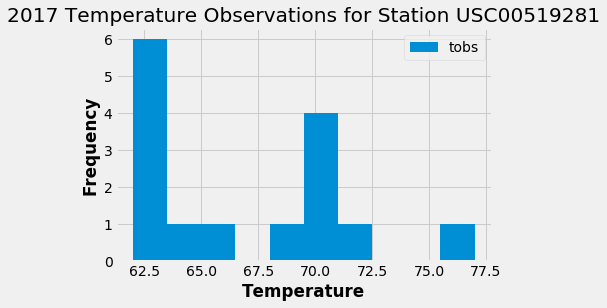

In [70]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temperatures)
plt.title('2017 Temperature Observations for Station USC00519281')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)
plt.show()

In [71]:
# Check the Temperatures one year prior of selected Vacay Dates.

start="2017-07-02"
end ="2017-07-06"
vakayQuery = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
print (vakayQuery)


[(80.0,), (78.0,), (80.0,), (80.0,), (81.0,), (77.0,), (77.0,), (77.0,), (77.0,), (76.0,), (81.0,), (81.0,), (87.0,), (80.0,), (79.0,), (80.0,), (81.0,), (80.0,), (79.0,), (81.0,), (76.0,), (78.0,), (77.0,), (74.0,), (78.0,), (77.0,), (77.0,), (75.0,), (74.0,)]


In [72]:
temp_df=pd.DataFrame(vakayQuery)
temp_df.head()

,tobs
0,80.0
1,78.0
2,80.0
3,80.0
4,81.0


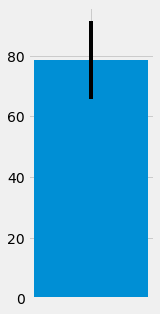

In [73]:
start_date='2017-07-02'
end_date='2017-07-07'

def calc_temps(start_date, end_date):
    max_temp = temp_df["tobs"].max()
    min_temp = temp_df["tobs"].min()
    mean_temp = temp_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
    
calc_temps("2017-07-02", "2017-07-07")